# Coding copilot with custom functions with Autogen

In [1]:
## import required libraries
import os
from autogen import AssistantAgent, ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor
from dotenv import load_dotenv


load_dotenv(override=True) # load environment variables from .env file

True

In [2]:
## llm configuration
llm_config ={
                "model": "gpt-4o",
                "api_key": os.getenv("OPENAI_API_KEY")
            }

## Custom functions for stock analysis

In [3]:
## function to get stock data
def get_stock_prices(
    stock_symbols,
    start_date,
    end_date
):
    """
    Fetch stock closing prices for given stock symbols between start and end dates.

    Args:
        stock_symbols: Stock symbol(s) to fetch prices for. Can be a string or a list of strings.
        start_date: The start date in 'YYYY-MM-DD' format.
        end_date: The end date in 'YYYY-MM-DD' format.

    Returns:
        DataFrame: Stock closing prices indexed by date, with one column per stock symbol.
    """
    import yfinance
    from pandas import DataFrame
    
    try:
        stock_data = yfinance.download(stock_symbols, start=start_date, end=end_date)
        return stock_data["Close"]
    except Exception as e:
        print(f"Error fetching stock data: {str(e)}")
        return DataFrame()

In [4]:
## plot the stock prices
import matplotlib.pyplot as plt
from pandas import DataFrame

def plot_stock_prices(stock_prices, filename):
    """
    Plot stock prices and save the figure to a file.

    Args:
        stock_prices (DataFrame): Stock prices indexed by date, with columns for each stock.
        filename (str): Name of the file to save the plot.
    """
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    plt.figure(figsize=(10, 5))
    stock_prices.plot(ax=plt.gca(), grid=True)
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.close()

## A new executor with custom functions

In [5]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [6]:
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

In [7]:
code_writer_system_message += executor.format_functions_for_prompt()
print(code_writer_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or 

## Create agents with updated system message

In [8]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [9]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [10]:
from datetime import date

chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {date.today()}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-09-29.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Alright, let's solve this step-by-step:

1. Calculate the Start Date: We'll determine the start date for year-to-date (YTD) data.
2. Fetch Stock Prices: We'll use the `get_stock_prices` function to download the stock prices for NVDA and TSLA from the start date to the current date (2024-09-29).
3. Plot Stock Prices: We'll use the `plot_stock_prices` function to plot the prices and save the plot to a file.

Here's the full code:

```python
# filename: download_and_plot_stocks.py

from datetime import datetime
from functions import get_stock_prices, plot_stock_prices

# Step 1: Calculate the start date for YTD
current_date = datetime.

Replying as code_executor_agent. Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: 
[                       0%                       ]
[*********************100%***********************]  2 of 2 completed
Stock prices plot saved to stock_prices_YTD_plot.png


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Great! It looks like everything executed successfully and the stock prices plot has been saved to `stock_prices_YTD_plot.png`.

If you have any more tasks or questions, feel free to ask. 

TERMINATE

--------------------------------------------------------------------------------


Replying as code_executor_agent. Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit


## Plot the results

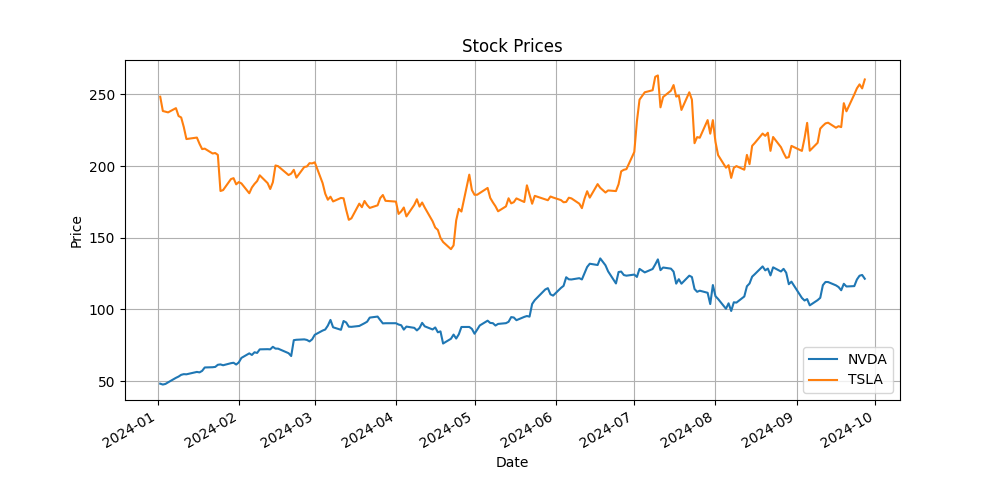

In [11]:
from PIL import Image

# Define the path to the image file
image_path = os.path.join("coding", "stock_prices_YTD_plot.png")

# Open the image
Image.open(image_path)